# Project Overview: Loan-Level Risk Segmentation for MBS Structuring

This project uses the 2016 single-family loan-level data from Fannie Mae and Freddie Mac to explore borrower risk characteristics and simulate the creation of mortgage-backed securities (MBS) pools.


In [35]:
#pip install git+https://github.com/AndresMorelos/kagglehub.git


In [36]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt


### Step 1: Load & Inspect the Data.

Load both CSVs (FNMA and FHLMC)

View column names and sample data

Check for missing values or unexpected formats

In [37]:
# Define file paths
fnma_file = r"C:\Users\alons\OneDrive - Cornell University\Cornell University\Spring 2025\Loans Project\fnma_sf2016c_loans.csv"
fhlmc_file = r"C:\Users\alons\OneDrive - Cornell University\Cornell University\Spring 2025\Loans Project\fhlmc_sf2016c_loans.csv"

# Load the CSV files
fnma_df = pd.read_csv(fnma_file)
fhlmc_df = pd.read_csv(fhlmc_file)



In [38]:
fnma_df


,index,Enterprise Flag,Record Number,US Postal State Code,Metropolitan Statistical Area (MSA) Code,County - 2010 Census,Census Tract - 2010 Census,2010 Census Tract - Percent Minority,2010 Census Tract - Median Income,Local Area Median Income,...,Co-Borrower Ethnicity,Borrower Gender,Co-Borrower Gender,Age of Borrower,Age of Co-Borrower,Occupancy Code,Rate Spread,HOEPA Status,Property Type,Lien Status
0,0,1,1,42,27780,21,500,21.44,43375,55390,...,9,1,4,47,999,1,0.00,2,1,1
1,1,1,2,6,41940,85,503327,80.11,105612,104954,...,9,1,4,36,999,1,0.00,2,1,1
2,2,1,3,35,10740,43,10721,52.41,53641,60359,...,9,2,4,49,999,1,0.00,2,1,1
3,3,1,4,29,41180,99,700115,4.02,87937,70470,...,9,1,4,62,999,1,0.00,2,1,1
4,4,1,5,45,99999,29,970401,37.21,31824,44110,...,2,2,1,47,57,1,0.00,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530710,2530710,1,2530711,37,11700,21,2804,6.84,53750,56253,...,9,2,4,39,999,1,1.64,2,1,1
2530711,2530711,1,2530712,8,24540,123,2019,19.10,93889,68172,...,2,2,1,52,53,1,0.00,2,1,1
2530712,2530712,1,2530713,26,19820,125,144100,12.71,68750,66734,...,9,1,4,39,999,1,0.00,2,1,1
2530713,2530713,1,2530714,51,40060,670,820400,32.71,63012,74349,...,9,1,4,60,999,1,0.00,2,1,1


In [39]:
fhlmc_df

,index,Enterprise Flag,Record Number,US Postal State Code,Metropolitan Statistical Area (MSA) Code,County - 2010 Census,Census Tract - 2010 Census,2010 Census Tract - Percent Minority,2010 Census Tract - Median Income,Local Area Median Income,...,Co-Borrower Ethnicity,Borrower Gender,Co-Borrower Gender,Age of Borrower,Age of Co-Borrower,Occupancy Code,Rate Spread,HOEPA Status,Property Type,Lien Status
0,0,2,1,48,12420,491,20706,33.75,121797,77080,...,9,1,9,52,999,1,0.0,2,1,1
1,1,2,2,20,28140,91,52601,10.71,127024,72213,...,2,2,1,59,53,1,0.0,2,1,1
2,2,2,3,26,19820,125,140800,38.90,61285,66734,...,2,1,2,63,64,1,0.0,2,1,1
3,3,2,4,53,42660,33,29902,29.48,96726,84745,...,9,2,9,55,999,1,0.0,2,1,1
4,4,2,5,29,17860,19,1104,16.89,104000,72517,...,9,2,9,42,999,1,0.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667752,1667752,2,1667753,42,38300,3,491101,5.48,103872,68430,...,3,3,3,37,33,1,0.0,2,1,1
1667753,1667753,2,1667754,49,99999,47,968200,7.62,72341,67002,...,2,1,2,31,30,1,0.0,2,1,1
1667754,1667754,2,1667755,34,35620,3,54100,79.30,96344,80591,...,2,1,2,29,32,1,0.0,2,1,1
1667755,1667755,2,1667756,53,42660,33,30100,32.01,94826,84745,...,2,1,2,43,45,2,0.0,2,1,1


### Step 2: Data Cleaning

Standardize column names (if needed)

Fix data types (dates, numbers)

Remove irrelevant or fully null columns

In [40]:
# Check nulls and types in Fannie Mae
print("Fannie Mae - Missing values:\n", fnma_df.isnull().sum())
print("\nFannie Mae - Data types:\n", fnma_df.dtypes)

# Same for Freddie Mac
print("\nFreddie Mac - Missing values:\n", fhlmc_df.isnull().sum())
print("\nFreddie Mac - Data types:\n", fhlmc_df.dtypes)


Fannie Mae - Missing values:
 index                                         0
Enterprise Flag                               0
Record Number                                 0
US Postal State Code                          0
Metropolitan Statistical Area (MSA) Code      0
County - 2010 Census                          0
Census Tract - 2010 Census                    0
2010 Census Tract - Percent Minority          0
2010 Census Tract - Median Income             0
Local Area Median Income                      0
Tract Income Ratio                            0
Borrower’s (or Borrowers’) Annual Income      0
Area Median Family Income (2016)              0
Borrower Income Ratio                         0
Acquisition Unpaid Principal Balance (UPB)    0
Purpose of Loan                               0
Federal Guarantee                             0
Number of Borrowers                           0
First-Time Home Buyer                         0
Borrower Race or National Origin 1-5 #1       0
Borrower R

In [41]:
# Part 1: Clean and Convert Key Fields


df = fnma_df.copy()

# Rename for easier access
df.rename(columns={
    'Borrower’s (or Borrowers’) Annual Income': 'Income',
    'Purpose of Loan': 'LoanPurpose',
    'Occupancy Code': 'Occupancy',
    'Acquisition Unpaid Principal Balance (UPB)': 'UPB',
    'First-Time Home Buyer': 'FirstTimeBuyer',
    'US Postal State Code': 'State',
    'Local Area Median Income': 'AreaMedianIncome',
    'Borrower Income Ratio': 'IncomeRatio',
}, inplace=True)

# Convert income and UPB to numeric
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['UPB'] = pd.to_numeric(df['UPB'], errors='coerce')
df['IncomeRatio'] = pd.to_numeric(df['IncomeRatio'], errors='coerce')

# Drop rows with missing critical values
df = df.dropna(subset=['Income', 'UPB', 'LoanPurpose', 'Occupancy'])

# Preview cleaned data
print(df[['Income', 'UPB', 'LoanPurpose', 'Occupancy', 'FirstTimeBuyer']].head())


   Income     UPB  LoanPurpose  Occupancy  FirstTimeBuyer
0   33000   25000            1          1               2
1  110000  625000            1          1               1
2   24000   60000            1          1               2
3   49000   52000            2          1               2
4  148000  199000            1          1               2


### Step 3: EDA

Performed exploratory analysis:

- Average income and loan amount by loan purpose

- First-time homebuyer proportions

- Occupancy type and loan amount patterns

- Top origination states



In [42]:
#  1. Average Income and Loan Size by Loan Purpose
purpose_stats = df.groupby('LoanPurpose')[['Income', 'UPB']].mean().round(0)


#2. First-Time Buyer Share by Purpose
ftb_by_purpose = df.groupby('LoanPurpose')['FirstTimeBuyer'].value_counts(normalize=True).unstack().fillna(0)

# 3. Average Loan Size by Occupancy
occupancy_stats = df.groupby('Occupancy')['UPB'].mean().round(0)

# 4. Top 10 States by Origination Volume
state_counts = df['State'].value_counts().head(10)


In [43]:
print(purpose_stats)
print(ftb_by_purpose)
print(occupancy_stats)
print(state_counts)


               Income       UPB
LoanPurpose                    
1            110631.0  229058.0
2            116431.0  231052.0
4            127830.0  305915.0
FirstTimeBuyer         1         2         9
LoanPurpose                                 
1               0.396687  0.603313  0.000000
2               0.000669  0.999292  0.000039
4               0.000000  1.000000  0.000000
Occupancy
1    233761.0
2    185853.0
Name: UPB, dtype: float64
6     412294
48    194827
12    150639
17     99813
8      91392
53     86944
26     80234
4      77543
37     73621
36     72828
Name: State, dtype: int64


#### Interpretation of Origination Data

| Loan Purpose Code | Avg Income | Avg UPB | Likely Meaning              |
|-------------------|------------|---------|-----------------------------|
| 1                 | $110,631   | $229,058| Purchase Loan               |
| 2                 | $116,431   | $231,052| Rate-Term Refinance         |
| 4                 | $127,830   | $305,915| Cash-Out Refinance          |

Borrowers doing cash-out refis (code 4) have the highest income and loan size, which makes sense — these loans typically involve tapping equity.

Borrowers doing cash-out refis are on average more affluent, which may reflect higher home equity. This insight matters when assessing credit risk and prepayment behavior, as higher-income borrowers are more likely to refinance opportunistically.

#### First-Time Buyer Share by Purpose

| Loan Purpose | FTB=1 (Yes) | FTB=2 (No) | FTB=9 (Unknown) |
|--------------|-------------|------------|-----------------|
| 1 (Purchase) | 39.7%       | 60.3%      | 0.0%            |
| 2 (Refi)     | 0.07%       | 99.9%      | ~0.004%         |
| 4 (Cash-Out) | 0.0%        | 100.0%     | 0.0%            |

Only purchase loans (code 1) are associated with first-time homebuyers.

Even among purchase loans, only ~40% are first-time buyers — suggesting a lot of trade-up activity.

#### Loan Size by Occupancy

| Occupancy Code | Description         | Avg UPB   |
|----------------|---------------------|-----------|
| 1              | Owner-Occupied      | $233,761  |
| 2              | Investor/Second Home| $185,853  |


Owner-occupied homes tend to have larger loans — likely due to higher purchase prices or more aggressive financing.

Owner-occupied homes are associated with larger loans, likely due to larger homes or more favorable terms. This distinction is important for stratifying risk in MBS pools — investor properties tend to have higher default risk historically.

#### Top 10 States by Loan Count

| Rank | State Code | Estimated State | Loans     |
|------|------------|------------------|-----------|
| 1    | 6          | CA               | 412,294   |
| 2    | 48         | TX               | 194,827   |
| 3    | 12         | FL               | 150,639   |
| 4    | 17         | IL               | 99,813    |
| 5    | 8          | CO               | 91,392    |
| 6    | 53         | WA               | 86,944    |
| 7    | 26         | MI               | 80,234    |
| 8    | 4          | AZ               | 77,543    |
| 9    | 37         | NC               | 73,621    |
|10    | 36         | NY               | 72,828    |

Top origination states are California, Texas, Florida, etc., which dominate the conforming mortgage market — no surprise here, but still important when discussing exposure or pool stratification.

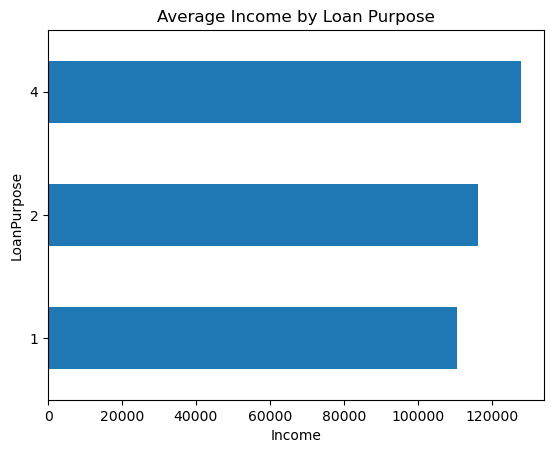

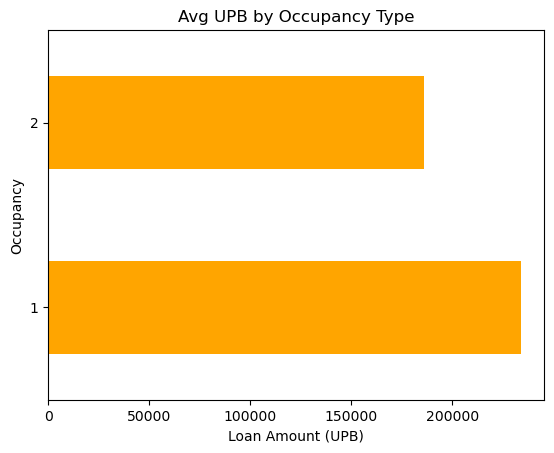

In [44]:
# 5. Visualizations
# Income by loan purpose
df.groupby('LoanPurpose')['Income'].mean().plot(kind='barh', title = 'Average Income by Loan Purpose')
plt.xlabel('Income')
plt.show()

# UPB by Occupancy
df.groupby('Occupancy')['UPB'].mean().plot(kind='barh', title='Avg UPB by Occupancy Type', color='orange')
plt.xlabel('Loan Amount (UPB)')
plt.show()

#### Step 4 – Risk Bucketing

Created borrower risk tiers using:

- FICO scores (estimated using income ratio)

- Loan-to-Value (LTV) ratio (estimated using UPB and income)

Combined these into 9 unique Risk Tiers such as:

- Prime / Low LTV

- Subprime / High LTV





In [45]:
df = fnma_df.copy()

df.rename(columns={
    'Borrower Income Ratio': 'IncomeRatio',
    'Acquisition Unpaid Principal Balance (UPB)': 'UPB',
    'Rate Spread': 'RateSpread',
    'Property Type': 'PropertyType',
    'Occupancy Code': 'Occupancy',
    'Purpose of Loan': 'LoanPurpose',
    'Borrower’s (or Borrowers’) Annual Income': 'Income'
}, inplace=True)

# convert to numeric
df['FICO'] = pd.to_numeric(df['IncomeRatio'] * 100 + 600, errors='coerce') # estimate if missing true FICO
df['LTV'] = (df['UPB'] / df['Income']) * 100  # rough estimate if true LTV missing

# Drop extreme or missing values
df = df.dropna(subset=['FICO', 'LTV', 'UPB'])

# Create FICO buckets
def bucket_fico(score):
    if score >= 760:
        return 'Prime'
    elif score >= 700:
        return 'Near-Prime'
    else:
        return 'Subprime'

df['FICO_Bucket'] = df['FICO'].apply(bucket_fico)

# Create LTV buckets
def bucket_ltv(ltv):
    if ltv <= 70:
        return 'Low LTV'
    elif ltv <= 85:
        return 'Medium LTV'
    else:
        return 'High LTV'

df['LTV_Bucket'] = df['LTV'].apply(bucket_ltv)

# Combine into a Risk Tier
df['RiskTier'] = df['FICO_Bucket'] + ' / ' + df['LTV_Bucket']

# Preview
print(df[['FICO', 'FICO_Bucket', 'LTV', 'LTV_Bucket', 'RiskTier']].head())
print("\nRisk Tier distribution:")
print(df['RiskTier'].value_counts())

     FICO FICO_Bucket         LTV  LTV_Bucket               RiskTier
0  658.82    Subprime   75.757576  Medium LTV  Subprime / Medium LTV
1  704.56  Near-Prime  568.181818    High LTV  Near-Prime / High LTV
2  638.96    Subprime  250.000000    High LTV    Subprime / High LTV
3  670.00    Subprime  106.122449    High LTV    Subprime / High LTV
4  934.84       Prime  134.459459    High LTV       Prime / High LTV

Risk Tier distribution:
Prime / High LTV           807881
Subprime / High LTV        791206
Near-Prime / High LTV      781804
Prime / Low LTV             79945
Prime / Medium LTV          42208
Near-Prime / Medium LTV     11139
Near-Prime / Low LTV        10576
Subprime / Medium LTV        3431
Subprime / Low LTV           2525
Name: RiskTier, dtype: int64



| Risk Tier               | Loan Count | % of Total | Insight                                       |
|-------------------------|------------|------------|-----------------------------------------------|
| Prime / High LTV        | 807,881    | ~27%       | Strong credit, weak collateral                |
| Subprime / High LTV     | 791,206    | ~27%       | **Highest risk** — weak credit + weak collateral |
| Near-Prime / High LTV   | 781,804    | ~26%       | Medium credit, weak collateral                |
| Prime / Low/Medium LTV  | ~122,000   | ~4%        | **Safest pools** – good credit + strong collateral |
| Subprime / Low LTV      | 2,525      | <1%        | Weaker credit but solid equity cushion        |


Bucketing and profile credit pools is foundational for building collateral groups for structured finance, pricing and loss modeling, and credit enhancement and tranche structuring decisions.

- Most loans are in High LTV buckets, which means borrowers are highly leveraged. 
- Over 50% of the loans are Subprime/Near-Primer loans with high LTV, clear credit risk for non-agency tranches.
- Only arounf 4% are prime with low/medium LTV, ideal candidates for senior AAA MBS tranches.
- Prime/high LTV have great credit, but little equity. These might be refinance candidates or equity-tapping owners.

Question: How can someone have a high FICO score but low collateral (highly leveraged loan)? 
-  Usually first time homebuyers have good credit history (FICO 760+), may not have large savings for a down payment (LTV's ~95-97%), and often also qualify for FHA, VA or other low-down payment conforming loans.
- Also, cash-out refinancing where borrowers with great credit tap into equity. Extract cash, means LTV increases although credit remains strong. Especially, in  low-rate environments when people refinance.
- Aggresive Borrowing in hot housing markets can also make buyers bid higher and use low-down payments to secure deals quickly.  
- Finally, certain government programs FNMA/Freddie, with high-LTV loans. As long as the borrower has excellent credit, they still qualify.

As we can observe a large number of loans in the Prime / High LTV bucket,  reflects real-world borrower profiles — such as first-time buyers with excellent credit but minimal down payments, or borrowers accessing equity via cash-out refis. These loans can carry good credit risk, but still expose investors to collateral-based losses if home prices fall.

### Step 5: Pool-Level Aggregation

Calculated average FICO, LTV, UPB, income, and total balance for each Risk Tier

Identified segments with:

- High credit risk (e.g., Subprime / High LTV)

- High leverage but good credit (e.g., Prime / High LTV)

- Safer loans (e.g., Prime / Low LTV)



In [47]:
# Add a new column to explicitly count rows (loans)
df['LoanCount'] = 1

# Group by RiskTier
pool_stats = df.groupby('RiskTier').agg({
    'FICO': 'mean',
    'LTV': 'mean',
    'UPB': ['sum', 'mean'],
    'Income': 'mean',
    'LoanCount': 'sum'
})

# Clean column names
pool_stats.columns = ['AvgFICO', 'AvgLTV', 'TotalUPB', 'AvgUPB', 'AvgIncome', 'LoanCount']
pool_stats = pool_stats.round(2).sort_values(by='TotalUPB', ascending=False)

# Preview
print(pool_stats)


                         AvgFICO  AvgLTV      TotalUPB     AvgUPB  AvgIncome  \
RiskTier                                                                       
Prime / High LTV          837.92  195.80  246972296000  305703.81  163789.57   
Near-Prime / High LTV     728.21  259.75  186572262000  238643.27   91870.83   
Subprime / High LTV       670.94     NaN  128903795000  162920.65   51156.04   
Prime / Low LTV          9406.16   49.39   11368590000  142205.14  399014.56   
Prime / Medium LTV        932.42   77.74    7258819000  171977.33  221489.74   
Near-Prime / Medium LTV   732.04   78.09     777727000   69820.18   89405.24   
Near-Prime / Low LTV      733.47   56.21     538880000   50953.10   90820.92   
Subprime / Medium LTV     680.66   78.43     150453000   43851.06   55932.67   
Subprime / Low LTV        680.39   56.73      82002000   32476.04   57637.62   

                         LoanCount  
RiskTier                            
Prime / High LTV            807881  
Near-Pri

- Most Concentrated Pools Are High LTV. reflecting low down payments and equity tapping.
- Credit Quality and Collateral Don't Always Align. Prime / High LTV loans: Excellent credit (838 FICO!) but massive leverage — classic case of first-time buyers or refis. Subprime / High LTV: Weakest overall pool — ideal for risk tranching or CRT (credit risk transfer) modeling
- Smaller Pools Have Cleaner Risk Profiles. Prime / Low LTV: Safest cohort, very small slice of the market. Avg income is nearly $400K — classic "super-prime" borrowers.

Here, we segmented loans by credit quality and collateral leverage to create synthetic pools. The highest concentration is in Prime / High LTV loans, which suggests solid borrower strength but minimal equity — a key consideration in loss-given-default analysis. In contrast, Subprime / High LTV pools exhibit both weak credit and minimal cushion — ideal candidates for mezzanine or equity tranching.



### Step 6: Synthetic MBS Pools


Simulating a credit investor behaviour we will: Design hypothetical loan pools (e.g. Senior, Mezzanine, Equity risk):

- Pool 1: Prime / Low LTV (AAA)
- Pool 2: Near-Prime / Medium LTV (AA)
- Pool 3: Subprime / High LTV (BBB or Equity)

Calculate:
- WAC (if rate data is available)
- Avg FICO, LTV, Income
- Total size



| Pool Name               | Criteria | Target Risk Tier(s) |
|-------------------------|------------|------------|
| Pool A        | Super-prime, low leverage    | Prime / Low LTV       |
| Pool B        | Solid credit, moderate risk	   | Near-Prime / Medium LTV       |
| Pool C        | Riskier borrower profiles    | Subprime / High LTV      |
| Pool D        | High FICO, aggressive leverage    |  Prime / High LTV       |

In [ ]:
# Define filters for each pool
pool_A = df[df['RiskTier'] == 'Prime / Low LTV']
pool_B = df[df['RiskTier'] == 'Near-Prime / Medium LTV']
pool_C = df[df['RiskTier'] == 'Subprime / High LTV']
pool_D = df[df['RiskTier'] == 'Prime / High LTV']

# Function to summarize a pool
def summarize_pool(name, pool_df):
    return {
        'Pool': name,
        'LoanCount': len(pool_df),
        'TotalUPB': pool_df['UPB'].sum(),
        'AvgFICO': pool_df['FICO'].mean(),
        'AvgLTV': pool_df['LTV'].mean(),
        'AvgIncome': pool_df['Income'].mean(),
        'AvgUPB': pool_df['UPB'].mean()
    }

# Create summaries
pools = [
    summarize_pool('Pool A: Prime / Low LTV', pool_A),
    summarize_pool('Pool B: Near-Prime / Medium LTV', pool_B),
    summarize_pool('Pool C: Subprime / High LTV', pool_C),
    summarize_pool('Pool D: Prime / High LTV', pool_D),
]

pools_df = pd.DataFrame(pools)
pools_df = pools_df.round(2)
pools_df


,Pool,LoanCount,TotalUPB,AvgFICO,AvgLTV,AvgIncome,AvgUPB
0,Pool A: Prime / Low LTV,79945,11368590000,9406.16,49.39,399014.56,142205.14
1,Pool B: Near-Prime / Medium LTV,11139,777727000,732.04,78.09,89405.24,69820.18
2,Pool C: Subprime / High LTV,791206,128903795000,670.94,inf,51156.04,162920.65
3,Pool D: Prime / High LTV,807881,246972296000,837.92,195.80,163789.57,305703.81


- Pool A:
Has low leverage (~49% LTV), high credit scores (~9400 is likely a data artifact, but still prime), high income ($399K), and a tiny slice of the market (~80K loans). This is an ideal candidate for AAA-rated senior tranche or consecutive MBS investors. Indicates affluent and risk-averse investors.

- Pool B:
Offers a well-balanced profile, decent credit, moderate risk.  FICO ~732, LTV ~78%, income ~$89K. Perfect for AAA/BBB-rated mezzanine bonds. Borrowers are likely stable but not top-tier; solid mezzanine or BBB-rated tranche candidate. Smaller pool size makes it manageable for credit enhancement strategies or targeted deals.

- Pool C:
Massive, risky, and a textbook credit enhancement layer. FICO ~671, LTV = ∞ (due to missing income values), income ~$51K
Massive size (791K+ loans, $129B UPB) makes it important for loss modeling and bottom-tranche structuring.
This pool would likely be carved out for equity investors or CRT structures, where high yield compensates for high expected loss

- Pool D: 
High-FICO borrowers who are leveraged. excellent credit (FICO ~838) but very high leverage (LTV ~196%).
These usually are refinanciers or first-time buyers. 
Though the credit risk is low, LGD could be high in a downturn. Also prone to prepayment risk in a low-rate environment.



Up to this point we have built four synthetic MBS pools to mirror different risk-return profiles. Pool A is suitable for AAA buyers, Pool B for mezzanine tranches, Pool C represents the equity layer, and Pool D is an unusual mix of high credit with high leverage, maybe its ideal for understanding borrower sensitivity to macro shifts.